In [17]:
  #import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import math

In [18]:
#mount the google drive into colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


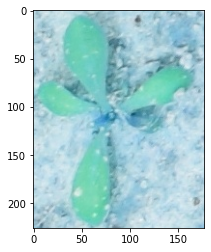

In [35]:
#open sample image
image = cv2.imread('/content/drive/MyDrive/ME project phase 1/CottonWeed/original/Carpetweeds/508bdb4955c745ed92d7a526a2210ff6__carpetweed__7.jpg')
plt.imshow(image)
plt.show()

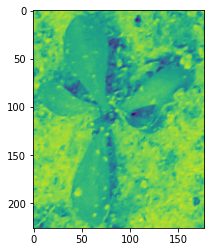

In [36]:
rcb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
y = (0.3*rcb[:,:,0]) +(0.6*rcb[:,:,1]) + (0.1*rcb[:,:,2])

plt.imshow(y)
plt.show()

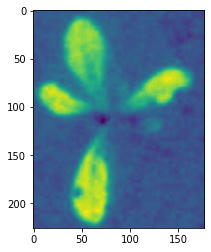

(226, 178)


In [37]:
Cg=rcb[:,:,1]-y
plt.imshow(Cg)
plt.show()

print(Cg.shape)

(-0.5, 177.5, 225.5, -0.5)

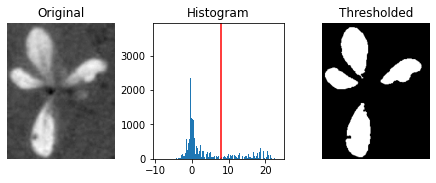

In [38]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(Cg)
binary = Cg > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box')

ax[0].imshow(Cg, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(Cg.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')


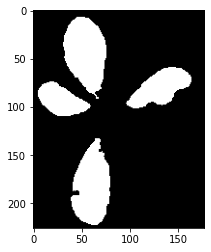

(226, 178)


In [39]:
plt.imshow(binary,cmap='gray')
plt.show()

print(binary.shape)

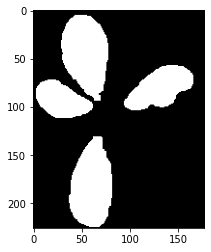

In [40]:
binary = binary.astype('uint8')
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(binary,kernel,iterations =1)
plt.imshow(dilation,'gray')
plt.show()

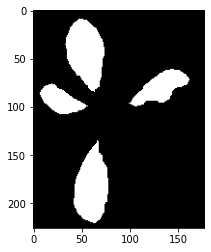

In [41]:
kernel = np.ones((9,9),np.uint8)
img_erosion = cv2.erode(dilation, kernel, iterations=1)
plt.imshow(img_erosion,'gray')
plt.show()

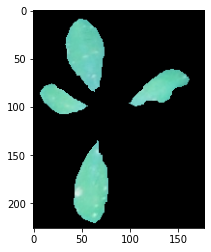

In [42]:
mask = img_erosion.astype('uint8')
result = cv2.bitwise_and(image,image,mask=mask)

plt.imshow(result)
plt.show()

**Segmentation**

(4032, 3024, 3)


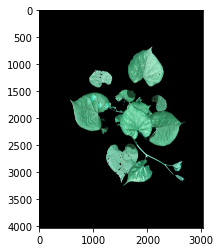

In [ ]:
image = cv2.imread("/content/drive/MyDrive/ME project phase 1/CottonWeed/original/Morning_glory/06282021_IphoneSE_YL_Morningglory_013.JPG")
rcb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
y = (0.3*rcb[:,:,0]) +(0.6*rcb[:,:,1]) + (0.1*rcb[:,:,2])
Cg=rcb[:,:,1]-y
thresh = threshold_otsu(Cg)
binary = Cg > thresh
binary = binary.astype('uint8')
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(binary,kernel,iterations =1)
kernel = np.ones((9,9),np.uint8)
img_erosion = cv2.erode(dilation, kernel, iterations=1)
result = cv2.bitwise_and(image,image,mask=img_erosion)

plt.imshow(result)
print(result.shape)

**Segmentation for all images**

In [ ]:
#data set path in my google drive
dir_path = '/content/drive/MyDrive/ME project phase 1/CottonWeed/original'
categories = ['Carpetweeds','Eclipta','Morning_glory','Ragweed']
total=0
for j in categories:
  path = dir_path+'/'+j
  i=0
  for img in os.listdir(path):
    image =  cv2.imread(os.path.join(path,img))
    rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    y = (0.3*rgb[:,:,0]) +(0.6*rgb[:,:,1]) + (0.1*rgb[:,:,2])
    Cg=rgb[:,:,1]-y
    thresh = threshold_otsu(Cg)
    binary = Cg > thresh
    binary = binary.astype('uint8')
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(binary,kernel,iterations =1)
    kernel = np.ones((9,9),np.uint8)
    img_erosion = cv2.erode(dilation, kernel, iterations=1)
    result = cv2.bitwise_and(image,image,mask=img_erosion)
    #file write
    file_path = '/content/drive/MyDrive/ME project segmented dataset/'+j+'/new_'+img
    cv2.imwrite(file_path,result)
    i += 1
  total += i
  print("   Segmenting "+ j + " images : ", i)
print("Total no of images : ", total)

   Segmenting Carpetweeds images :  182
   Segmenting Eclipta images :  123
   Segmenting Morning_glory images :  272
   Segmenting Ragweed images :  92
Total no of images :  669
